## Chapter 10 - Working With Data

Now focus is on Exploring Data.

A good first step is to explore the data by computing a few summary statistics, such as the min, max, mean, median and the standard deviation. These can be useful, but it is more powerful to create a histogram to obsserve how the data is distributed over discrete buckets


In [4]:
from helpers import Vector
from collections import Counter
from typing import Dict

import math

import matplotlib.pyplot as plt

def bucketsize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return  bucket_size*math.floor(point/bucket_size)

def make_histogram(points: Vector, bucket_size: float) -> Dict[float, int]:
    """ Buckets the points annd counts how mnay in each bucket """
    return Counter(bucketsize(point, bucket_size) for point in points)

def plot_histogram(points: Vector, bucket_size:float, title: str =""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)


normally distributed values [50.76301574707031, 18.964920043945312, 21.817703247070312, -78.38630676269531, 9.093246459960938, 33.36799621582031, -73.95057678222656, -59.80842590332031, -47.64930725097656, -39.27360534667969]


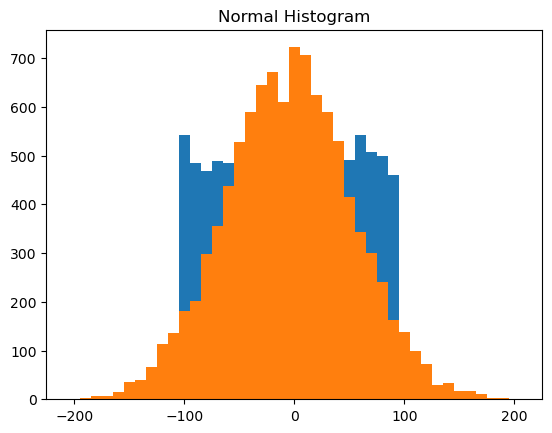

In [5]:
import random
from helpers import inverse_normal_cdf

random.seed(0)
uniform = [200*random.random()-100 for _ in range(10000)]

normal = [57*inverse_normal_cdf(random.random()) for _ in range(10000)]

print(f'normally distributed values {normal[:10]}')

plot_histogram(uniform, 10, "Uniform Histogram")

plot_histogram(normal, 10, "Normal Histogram")


From the above we can see just how different these distributions are, even though their means and standard deviations are both close to 0 and 58, respectively. That is why it is useful to explore other elements of the data to gain more of an understanding.

## Two dimensions


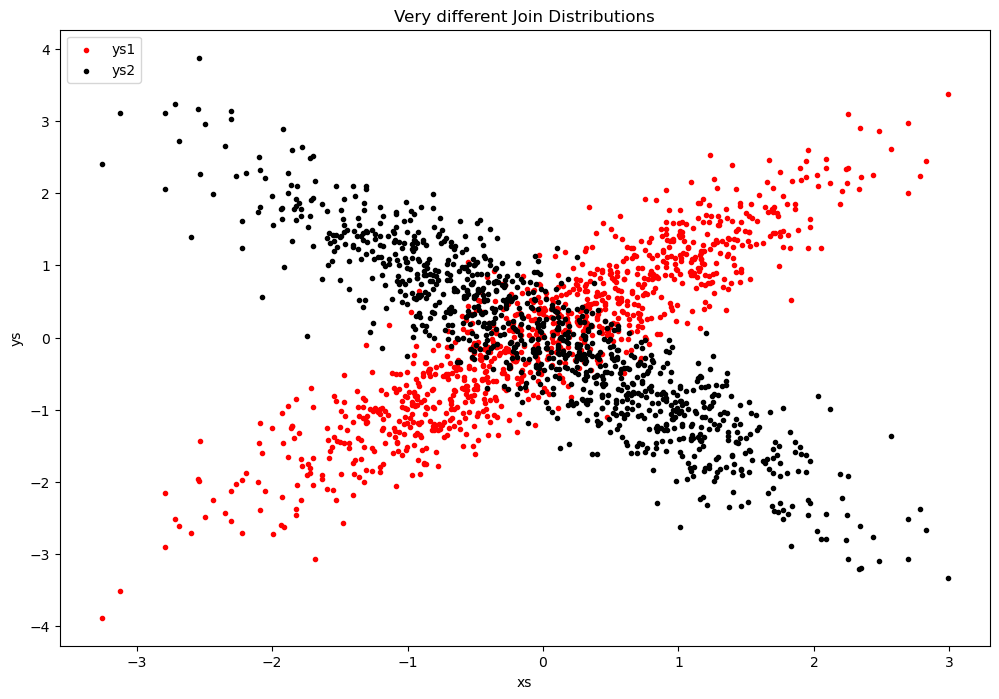

In [6]:
import matplotlib.pyplot as plt
def random_normal()-> float:
    """returns a random draw from a standard normla distribution"""
    return inverse_normal_cdf(random.random())

random.seed(4)
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal()/2 for x in xs]
ys2 = [-x + random_normal()/2 for x in xs]

fig, ax = plt.subplots(figsize=(12,8))
    
ax.scatter(xs,ys1, marker=".", color="red", label="ys1")
ax.scatter(xs,ys2, marker=".", color="black", label="ys2")
ax.set_xlabel("xs")
ax.set_ylabel("ys")
ax.legend(loc="upper left")
ax.set_title("Very different Join Distributions")
plt.show()


If we plotted a histogram from $ys1$ and $ys2$ the distributions look similar but the scattered diagram shows they are very different with different correlations.

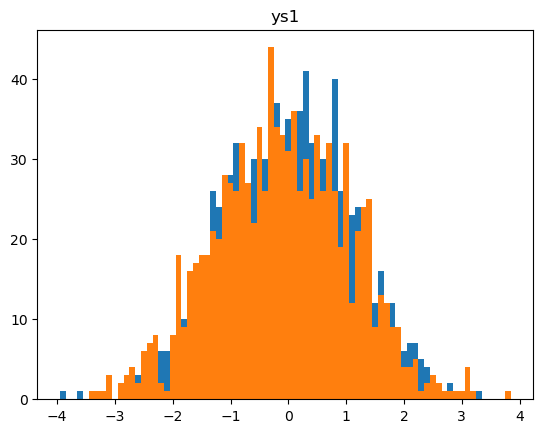

In [7]:
plot_histogram(ys1,0.1,"ys1")
plot_histogram(ys2,0.1,"ys1")

In [8]:
from helpers import covariance,correlation

print(correlation(xs, ys1)) #about 0.9
print(correlation(xs, ys2)) #about -0.9


0.9061974053822418
-0.9067535981127094


Say we want to know how dimensions relate to one another. A simple approach is to look at the correlation matrix, in which the entry i, j is the correlation between the oth dimension and the jth dimension of the data.

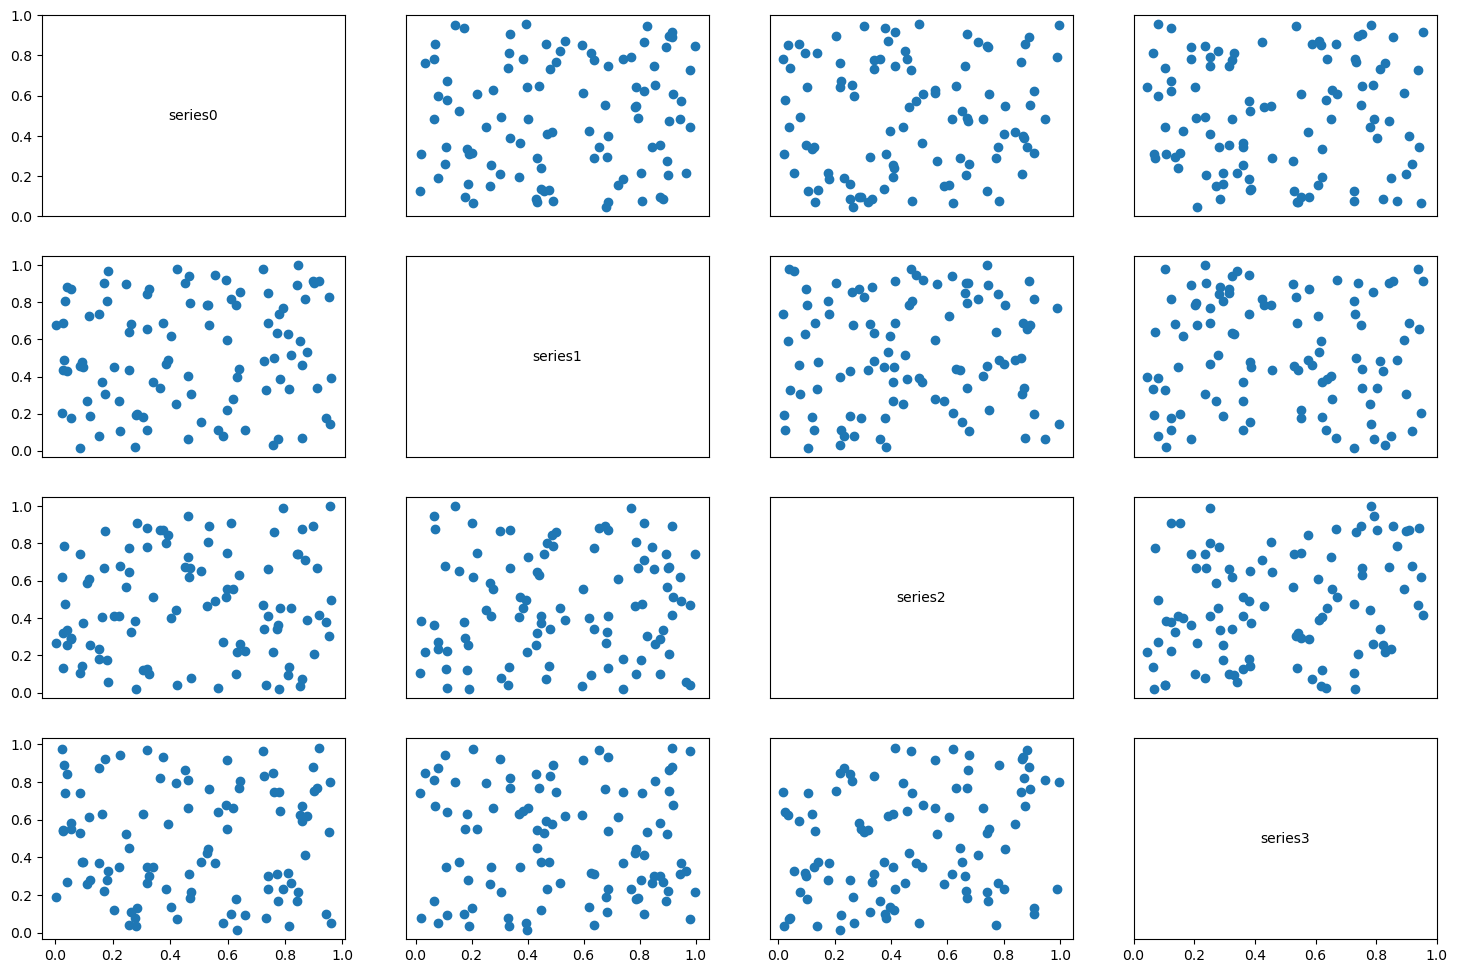

[[1.0000000000000002, 0.09217002086191081, 0.07537169786431919, -0.010445760243443415], [0.09217002086191083, 0.9999999999999998, 0.06987339330274434, -0.042375074171110444], [0.07537169786431917, 0.06987339330274434, 1.0, 0.24429916239787072], [-0.010445760243443417, -0.042375074171110444, 0.2442991623978707, 0.9999999999999998]]


In [9]:
import importlib, helpers
importlib.reload(helpers) #use this to re-import the lib in case we've made any changes to that file.
from helpers import Vector, correlation, Matrix, make_a_matrix

def correlation_matrix(data: Vector) -> Matrix:
    """Returns the len(data) x len(data matrix whose (i,j)-th entry is the correlation between data[i] and data[j]"""
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i],data[j])

    return make_a_matrix(len(data), len(data), correlation_ij)

corr_data = [[random.random() for _ in range(100)] for _ in range(4)]
#print(corr_data)

num_of_vectors = len(corr_data)
fig, ax = plt.subplots(num_of_vectors,num_of_vectors,figsize=(18,12))

for i in range(num_of_vectors):
    for j in range(num_of_vectors):

        if i != j:
            ax[i][j].scatter(corr_data[j],corr_data[i])
        else:
            ax[i][j].annotate("series" + str(i), (0.5,0.5), xycoords='axes fraction', ha='center',va='center')

        if i < num_of_vectors - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)

plt.show()

C = correlation_matrix(corr_data)
print(C)

## Using NamedTuples

In [10]:
from typing import NamedTuple
import datetime 
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG','FB','AMZN','AAPL']

price = StockPrice('MSFT',datetime.date(2025,10,10), 1920)

assert price.symbol == 'MSFT'
assert price.closing_price == 1920

price.is_high_tech()

True

## Using @dataclass

In [11]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG','FB','AMZN','AAPL']

price = StockPrice2('MSFT',datetime.date(2025,10,10), 1920)
assert price.symbol == 'MSFT'
assert price.closing_price == 1920

price.is_high_tech()


True

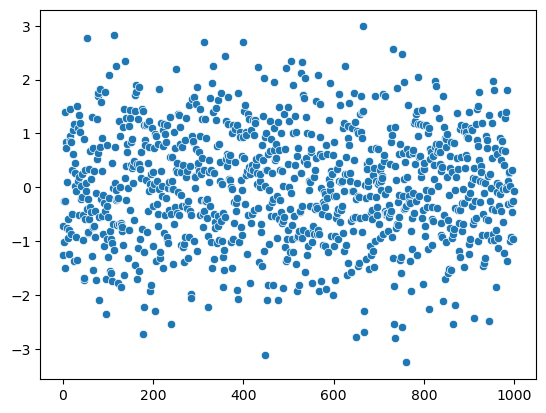

In [12]:
import seaborn as sns

sns.scatterplot(data=xs)
plt.show()

## Clearning and Munging

Real-world data is dirty. Often cleaning of data is needed before we can work on it. We can produce code that is less error-prone and that fails gracefully by using 
try-catch blocks

In [13]:
from dateutil.parser import parse
from typing import List 

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol, date=parse(date).date(), closing_price=float(closing_price))

stock = parse_row(['MSFT',"2025-01-01", 1920])
assert stock.symbol == 'MSFT'
assert stock.closing_price == 1920
assert stock.date == datetime.date(2025,1,1)

print(stock)

#What if there is bad data in a row. Rather than crash the program we can fail nicely.
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]: # the optional allows the data type returned to be StockPrice class object or something else.
    symbol, date_, closing_price_ = row

    if not re.match(r"^[A-Z]+$",symbol): 
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

#lets read in data from an excel csv file and then set invalid data to None.

import csv
data: List[StockPrice] = []

with open("stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
            continue
        else:
            data.append(maybe_stock)

print(data)           

StockPrice(symbol='MSFT', date=datetime.date(2025, 1, 1), closing_price=1920.0)
skipping invalid row: ['MSFT', '6/20/2018', 'n/a']
[StockPrice(symbol='APPL', date=datetime.date(2014, 6, 20), closing_price=90.91), StockPrice(symbol='MSFT', date=datetime.date(2015, 6, 20), closing_price=41.68), StockPrice(symbol='FB', date=datetime.date(3014, 6, 20), closing_price=64.5), StockPrice(symbol='APPL', date=datetime.date(2017, 6, 20), closing_price=91.86), StockPrice(symbol='FB', date=datetime.date(2019, 6, 20), closing_price=90.91)]


## Rescaling

Many techniques are sensitive to the scale of the data. For example, imagine we want to identify clusters of body sizes based on the a dataset which consists of heights and weights. 

| Person  | Height (inches) | Height (cm) | Weight (lbs)
| :------ | :------: | ----: | ------:
| A       |   63  | 160   | 150
| B       |   67  | 170.2 | 160
| C       |  70   |177.8  |171

We can group by taking the distance between the pair of (height, weight). If we do this in inches and cms we surprisingly get different results for which person is the closet neighbour to person B, for example. See code below


In [14]:

from helpers import vector_distance

a_to_b = vector_distance([63,150],[67,160])
a_to_c = vector_distance([63,150],[70,171])
b_to_c = vector_distance([67,160],[70,171])

print(f"AB= {a_to_b} AC={ a_to_c} BC={ b_to_c}")
#change to different units of height in cm
a_to_b = vector_distance([160,150],[170.2,160])
a_to_c = vector_distance([160,150],[177.8,171])
b_to_c = vector_distance([170.2,160],[177.8,171])

print(f"AB= {a_to_b} AC={ a_to_c} BC={ b_to_c}")

AB= 10.770329614269007 AC=22.135943621178654 BC=11.40175425099138
AB= 14.284257068535268 AC=27.52889391167034 BC=13.370115930686627


So you can see that when the units was inches then B nearest neighbour is A , BUT if we use cm insteads the closest is C. This is obviously an issue. When dimensions aren't comparable with one another, we will sometimes rescale our data so that each dimension has mean 0 and standard deviation = 1. This removes the units.


In [21]:
from typing import Tuple
from helpers import vector_mean, standard_deviation_of_data


def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the mean and standard deviation for each position"""
    dim = len(data[0])
    
    means = vector_mean(data)
    
    stdevs= [standard_deviation_of_data([vector[i] for vector in data]) for i in range(dim)]

    return means, stdevs

vectors:float = [[-3.0,-1.0,1.0],[-1.0,0.0,1.0],[1.0,1.0,1.0]]
print(vectors)
means, stdevs = scale(vectors)
print(means,stdevs)


[[-3.0, -1.0, 1.0], [-1.0, 0.0, 1.0], [1.0, 1.0, 1.0]]
[-1.0, 0.0, 1.0] [2.0, 1.0, 0.0]


Now that we have the mean and standard deviation, we can standardised it and rescale it and create a new dataset

In [20]:
from helpers import List, Vector

def rescale(data: List[Vector]) -> List[Vector]:
    """rescales the input data so that each position has mean 0 and standard deviation 1."""
    dim = len(data[0])

    means, stdevs = scale(data)

    #go through each position and standardise it z = (X - mean)/stanard deviation
    rescaled = [v[:] for v in data]
    
    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                print(f"v[{i}]={v[i]} with mean={means[i]} and sd={stdevs[i]}")
                
                v[i] = (v[i]-means[i])/stdevs[i]

    return rescaled
        

scale(rescale(vectors))

v[0]=-3 with mean=-1.0 and sd=2.0
v[1]=-1 with mean=0.0 and sd=1.0
v[0]=-1 with mean=-1.0 and sd=2.0
v[1]=0 with mean=0.0 and sd=1.0
v[0]=1 with mean=-1.0 and sd=2.0
v[1]=1 with mean=0.0 and sd=1.0


([0.0, 0.0, 1.0], [1.0, 1.0, 0.0])